# Week 7 - HMM Implementation

We're going to look at heart rate measurements made over the course of a day, when the subject slept, generally rested, and also went cycling.

In [1]:
%matplotlib inline
import numpy as np
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt
from scipy.stats import kstest, ttest_ind, ks_2samp, zscore, pareto
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

hr = np.array([55, 55, 54, 53, 52, 51, 50, 49, 49, 49, 49, 49, 49, 49, 47, 47, 47, 47, 47, 47, 47, 48, 49, 54, 54, 54, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 45, 45, 45, 45, 47, 49, 54, 54, 54, 45, 45, 45, 50, 50, 50, 47, 46, 45, 43, 43, 43, 44, 44, 44, 44, 44, 44, 45, 46, 47, 50, 50, 50, 46, 45, 44, 43, 43, 43, 43, 43, 43, 43, 44, 45, 52, 52, 52, 49, 48, 47, 45, 45, 45, 45, 45, 45, 44, 44, 44, 43, 43, 43, 44, 45, 46, 45, 46, 47, 54, 54, 54, 45, 45, 45, 45, 46, 47, 48, 48, 48, 46, 46, 46, 47, 47, 47, 47, 47, 47, 48, 48, 48, 47, 46, 45, 45, 45, 63, 63, 48, 47, 46, 46, 46, 46, 46, 46, 46, 45, 45, 45, 46, 47, 48, 49, 49, 49, 42, 42, 42, 42, 42, 42, 46, 49, 52, 58, 58, 58, 42, 42, 42, 43, 43, 43, 44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 46, 47, 49, 49, 49, 47, 46, 45, 45, 45, 45, 56, 56, 56, 49, 47, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 45, 45, 45, 49, 49, 49, 49, 49, 49, 43, 43, 43, 44, 44, 44, 43, 43, 43, 44, 44, 44, 43, 43, 43, 45, 45, 45, 45, 45, 45, 45, 45, 45, 44, 44, 44, 44, 44, 44, 49, 49, 49, 45, 45, 45, 52, 52, 52, 46, 45, 44, 44, 44, 44, 45, 45, 45, 45, 46, 47, 47, 48, 49, 49, 49, 49, 49, 49, 49, 50, 50, 50, 46, 46, 46, 48, 48, 48, 47, 47, 47, 47, 48, 49, 50, 50, 50, 48, 48, 48, 49, 49, 49, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 44, 44, 44, 46, 46, 46, 44, 44, 44, 48, 48, 48, 47, 46, 45, 45, 45, 45, 46, 46, 46, 47, 47, 47, 46, 46, 46, 46, 46, 46, 46, 46, 46, 54, 54, 54, 43, 43, 43, 43, 43, 43, 44, 44, 44, 43, 43, 43, 45, 45, 45, 43, 43, 43, 43, 43, 43, 45, 45, 45, 44, 44, 44, 43, 43, 43, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 47, 49, 51, 54, 54, 54, 46, 46, 46, 47, 47, 47, 46, 46, 46, 47, 47, 47, 45, 45, 45, 49, 49, 49, 44, 44, 44, 46, 46, 46, 45, 45, 45, 45, 46, 47, 48, 48, 48, 46, 46, 46, 51, 51, 51, 45, 45, 45, 47, 47, 47, 47, 47, 47, 46, 46, 46, 46, 48, 50, 55, 55, 55, 48, 47, 46, 46, 46, 46, 47, 47, 47, 48, 48, 48, 47, 47, 47, 48, 48, 48, 48, 49, 50, 53, 53, 53, 50, 50, 50, 53, 53, 53, 50, 49, 48, 48, 48, 48, 69, 69, 69, 62, 58, 54, 50, 50, 50, 50, 50, 50, 50, 50, 50, 53, 53, 53, 49, 49, 49, 50, 51, 52, 55, 55, 55, 52, 51, 50, 50, 50, 50, 50, 50, 50, 59, 59, 67, 67, 68, 68, 68, 60, 60, 60, 95, 95, 95, 90, 90, 90, 114, 125, 136, 144, 144, 144, 136, 135, 134, 134, 134, 134, 145, 145, 145, 127, 127, 127, 131, 135, 139, 147, 147, 147, 133, 128, 123, 125, 121, 117, 106, 106, 106, 126, 132, 138, 136, 138, 140, 141, 141, 141, 139, 139, 139, 140, 141, 142, 141, 142, 143, 155, 155, 155, 153, 152, 151, 148, 148, 148, 156, 156, 156, 154, 152, 150, 149, 148, 147, 146, 145, 144, 142, 141, 140, 139, 139, 139, 139, 139, 139, 143, 143, 143, 142, 141, 140, 139, 139, 139, 139, 139, 139, 142, 143, 144, 145, 145, 145, 125, 125, 125, 147, 147, 147, 146, 144, 142, 136, 136, 136, 142, 142, 142, 142, 142, 142, 133, 126, 119, 113, 107, 101, 94, 94, 94, 94, 95, 96, 95, 100, 105, 132, 136, 140, 140, 140, 140, 139, 136, 133, 126, 126, 126, 141, 142, 143, 143, 143, 143, 143, 144, 145, 145, 147, 149, 153, 153, 153, 132, 120, 108, 91, 91, 91, 91, 98, 105, 128, 135, 142, 142, 142, 142, 138, 136, 134, 134, 134, 134, 144, 145, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 149, 149, 149, 146, 146, 146, 147, 148, 149, 153, 153, 153, 153, 153, 153, 152, 151, 150, 150, 149, 148, 149, 147, 145, 132, 125, 118, 114, 114, 114, 140, 140, 140, 138, 135, 132, 127, 123, 119, 117, 115, 113, 114, 111, 108, 100, 100, 100, 100, 100, 100, 98, 98, 98, 105, 105, 105, 105, 105, 105, 112, 112, 112, 101, 97, 93, 91, 91, 91, 104, 104, 104, 99, 99, 99, 99, 103, 107, 134, 134, 134, 133, 133, 133, 133, 135, 137, 147, 147, 147, 144, 144, 144, 151, 151, 151, 149, 148, 147, 146, 146, 146, 146, 146, 146, 145, 138, 131, 115, 112, 109, 109, 109, 88, 88, 81, 81, 81, 85, 90, 95, 106, 106, 106, 84, 84, 84, 94, 98, 102, 103, 103, 103, 78, 74, 70, 70, 70, 70, 78, 78, 78, 78, 77, 76, 74, 74, 74, 75, 75, 75, 75, 75, 75, 93, 93, 93, 83, 83, 83, 85, 85, 71, 71, 63, 63, 63, 79, 79, 79, 66, 63, 60, 60, 60, 60, 60, 61, 62, 63, 63, 63, 62, 62, 62, 63, 64, 65, 65, 65, 65, 62, 62, 62, 69, 72, 75, 72, 76, 80, 96, 96, 96, 96, 96, 96, 96, 96, 96, 86, 81, 76, 74, 71, 68, 66, 64, 62, 63, 62, 61, 60, 60, 60, 60, 62, 64, 76, 76, 76, 70, 68, 66, 65, 65, 65, 71, 71, 71, 71, 69, 67, 62, 62, 62, 74, 74, 74, 74, 74, 74, 74, 72, 70, 66, 65, 64, 64, 64, 64, 80, 84, 88, 88, 88, 88, 88, 88, 88, 82, 79, 76, 78, 75, 72, 65, 64, 63, 63, 63, 63, 64, 64, 64, 63, 63, 63, 63, 63, 63, 64, 64, 64, 65, 65, 65, 63, 63, 63, 66, 72, 78, 94, 94, 94, 92, 92, 92, 92, 92, 92, 83, 83, 83, 88, 88, 88, 81, 78, 75, 74, 74, 74, 75, 75, 75, 71, 69, 67, 68, 67, 66, 67, 66, 65, 62, 62, 62, 65, 65, 65, 65, 64, 63, 62, 62, 62, 62, 62, 62, 61, 61, 61, 61, 61, 61, 62, 65, 68, 77, 77, 77, 58, 58, 58, 58, 62, 66, 89, 89, 89, 88, 88, 78, 78, 78, 78, 78, 60, 60, 60, 60, 60, 60, 56, 56, 56, 57, 57, 57, 55, 55, 55, 55, 56, 57, 58, 58, 58, 58, 58, 58, 59, 59, 59, 58, 58, 58, 58, 58, 58, 60, 60, 60, 59, 58, 57, 56, 56, 56, 61, 61, 61, 59, 59, 59, 62, 62, 62, 62, 61, 60, 59, 59, 59, 76, 76, 76, 76, 73, 70, 57, 57, 57, 59, 59, 59, 59, 59, 59, 56, 56, 56, 62, 62, 62, 59, 57, 55, 54, 54, 54, 55, 56, 57, 56, 57, 58, 60, 60, 60, 56, 56, 56, 62, 66, 70, 77, 77, 77, 66, 62, 58, 58, 58, 58, 58, 58, 58, 57, 56, 55, 54, 54, 54, 54, 55, 56, 56, 57, 58, 59, 60, 61, 61, 61, 61, 55, 55, 55, 58, 58, 58, 56, 56, 56, 58, 61, 64, 69, 69, 69, 55, 55, 55, 68, 68, 68, 58, 57, 56, 56, 56, 56, 55, 55, 55, 56, 59, 62, 68, 68, 68, 66, 64, 62, 58, 56, 54, 54, 54, 54, 62, 62, 62, 62, 62, 62, 62, 62, 62, 61, 60, 59, 59, 59, 59, 60, 60, 60, 60, 60, 60, 60, 61, 62, 66, 66, 66, 59, 58, 57, 58, 57, 56, 55, 55, 55, 58, 58, 58, 58, 58, 58, 59, 59, 59, 59, 60, 61, 66, 66, 66, 63, 62, 61, 60, 60, 60, 62, 62, 62, 59, 59, 59, 59, 59, 59, 61, 61, 61, 59, 59, 59, 59, 60, 61, 66, 70, 74, 82, 82, 82, 55, 55, 55, 55, 55, 55, 56, 57, 58, 57, 61, 65, 82, 82, 82, 59, 56, 53, 53, 53, 53, 53, 54, 55, 56, 56, 56, 55, 55, 55, 55, 55, 55, 56, 56, 56, 56, 56, 56, 57, 57, 57, 57, 57, 57, 62, 62, 62, 62, 61, 60, 57, 57, 57, 68, 68, 68, 63, 63, 63, 63, 63, 63, 60, 60, 60, 65, 65, 65, 62, 62, 62, 66, 66, 66, 63, 63, 63, 71, 71, 71, 60, 60, 60, 60, 60, 60, 59, 59, 59, 61, 61, 61, 57, 57, 57, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 63, 63, 63, 61, 61, 61, 62, 62, 62, 62, 61, 60, 59, 59, 59, 60, 60, 60, 59, 59, 59, 58, 58, 58, 57, 57, 57, 57, 57, 57, 59, 60, 61, 61, 61, 61, 60, 60, 60, 59, 59, 59, 61, 62, 63, 63, 63, 63, 60, 60, 60, 60, 60, 60, 60, 60, 60, 61, 62, 63, 62, 63, 64, 89, 89, 89, 81, 78, 75, 74, 74, 74, 79, 81, 83, 83, 83, 83, 83, 81, 79, 73, 70, 67, 64, 64, 64, 64, 64, 64, 62, 62, 62, 65, 65, 65, 64, 64, 64, 63, 63, 63, 64, 64, 64, 62, 61, 60, 60, 60, 60, 61, 64, 67, 70, 74, 78, 83, 83, 83, 60, 60, 60, 63, 63, 63, 61, 61, 61, 69, 69, 69, 64, 63, 62, 62, 62, 62, 61, 61, 61, 60, 60, 60, 60, 60, 60, 59, 59, 59, 60, 60, 60, 58, 58, 58, 61, 62, 63, 63, 65, 67, 74, 74, 74, 67, 67, 67, 69, 73, 77, 80, 86, 92, 104, 104, 104, 95, 90, 85, 81, 80, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 78, 76, 74, 71, 71, 71, 73, 73, 73, 68, 65, 62, 56, 56, 56, 56, 56, 56, 56, 56, 56, 58, 58, 58, 54, 54, 54, 59, 59, 59, 57, 57, 57, 57, 57, 57, 58, 58, 58, 57, 57, 57, 57, 57, 57, 58, 59, 60, 61, 61, 61, 57, 57, 57, 59, 59, 59, 58, 58, 58, 58, 58, 58, 52, 52, 52, 70, 70, 70, 70, 70, 70, 67, 66, 65, 64, 63, 62, 63, 62, 61, 54, 54, 54, 57, 57, 57, 57, 57, 57, 56, 55, 54, 52, 52, 52, 56, 56, 56, 56, 56, 56, 55, 55, 55, 61, 61, 61, 61, 61, 61, 64, 65, 66, 67, 67, 67, 50, 49, 48, 48, 48, 48, 51, 51, 51, 51, 51, 51, 51, 51, 51, 50, 50, 50, 49, 49, 49, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 50, 50, 50, 50, 50, 50, 49, 49, 49, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 51, 52, 52, 53, 54, 55, 56, 57, 60, 60, 60, 56, 55, 54, 55, 54, 53, 52, 52, 52, 56, 56, 56, 53, 53, 53, 53, 53, 53, 53, 53, 53, 58, 58, 58, 50, 50, 50, 51, 51, 51, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 55, 55, 55, 49, 49, 49, 49, 49, 49, 50, 52, 54, 60, 60, 60, 50, 49, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 48, 48, 48, 47, 47, 47, 48, 48, 48, 48, 48], dtype=np.float)

#### (1) Load the data and plot the observations.

You'll need to figure out an time axis vector for the data (it was recorded starting from midnight at even intervals over 24 hours).

1974


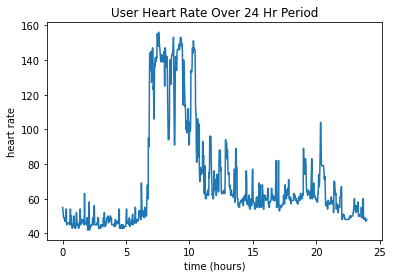

In [2]:
# Answer

time = np.linspace(0,24,1974)

print(len(hr))
plt.title('User Heart Rate Over 24 Hr Period')
plt.xlabel('time (hours)')
plt.ylabel('heart rate')
plt.plot(time,hr);


#### (2) Do you see regions where there might be differences in behavior?

Answer.
Yes, while resting seems to be between 40-60 bpm in the invidividual there are areas when the heart rate spikes to 140-160 BPM. There seems to be three regions in the plot sleeping (0-6), strenuous activity around 6-10, and then resting or normal heart rate from 10-20.

#### (3) Based on when you might expect someone would be asleep, plot the histogram of resting heart rate values.

The simplest emissions to use with `hmmlearn` are Gaussian ones. If our emissions are not Gaussian, we can still transform our data in some way to make it look more like a normal distribution. Given the shape of this distribution, do you think any transformation of the data would be helpful? Justify your answer.

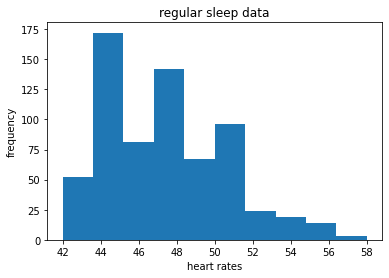

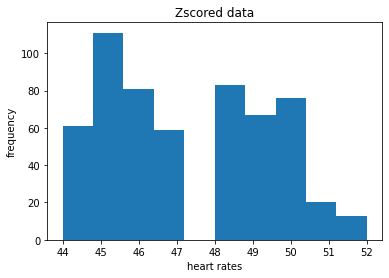

pvalue for norm kstest was: 9.528024254562377e-11
The best p-value I could get after trying many transformations was 
through removal of outliers as shown above.
I do not think it is particularly helpful as we could not successfully force a proper gaussian shape 
 and were still able to arrive at a decent estimation of wake up time
Additionally, transforming 3 different states into one gaussian emission may throw off the HMM(?)


In [3]:
# Answer
import sys
np.set_printoptions(threshold=sys.maxsize)

#Assume 9 to 7 am

# mask1 = time < 21
# mask2 = time > 6
# mask = np.logical_xor(mask1,mask2)

# x = hr[mask]
# x = zscore(x)
# a = kstest(x,'norm')
# plt.hist(hr[mask])
# print('pvalue for norm kstest was: ' + str(a[1]))
# print('according to the kstest this is probably not a Gaussian distribution')



model = GaussianHMM(n_components = 3)
hr = hr.reshape(-1,1)
model.fit(hr)
hiddenStates = model.predict(hr)
sleep = hiddenStates[0]
mask = hiddenStates == hiddenStates[0]
sleepData = hr[mask]
plt.hist(sleepData)
plt.title('regular sleep data')
plt.xlabel('heart rates')
plt.ylabel('frequency')
plt.show()

mask_sleep1 = sleepData <=52
mask_sleep2 = sleepData >=44
mask_sleep = np.logical_and(mask_sleep1, mask_sleep2)
sleepDataNorm = sleepData[mask_sleep]
plt.title('Zscored data')
plt.xlabel('heart rates')
plt.ylabel('frequency')
plt.hist(sleepDataNorm)
plt.show()

sleepDataNorm = np.log(sleepDataNorm)
x = zscore(sleepDataNorm)

a = kstest(x,'norm')

print('pvalue for norm kstest was: ' + str(a[1]))
print('The best p-value I could get after trying many transformations was \nthrough removal of outliers as shown above.')
print('I do not think it is particularly helpful as we could not successfully force a proper gaussian shape \n and were still able to arrive at a decent estimation of wake up time' )
print('Additionally, transforming 3 different states into one gaussian emission may throw off the HMM(?)')


#### (4) One way to deal with noisy data is to use a moving average. Plot the moving average of the data for two different windows. How does this help visualize the data? What is lost using this approach?

Hint: Look at the points with a sharp transition. What does the moving average do here?

Moving average plots points that utilize a designated number of points (window)
 adjacent to the selected point and finds the average value
So, in this case we see smoother lines with a greater window
By using this approach, it is possible that we miss significant outliers that may have some inherent meaning
 We also remove points in the upper and lower bound of the data.


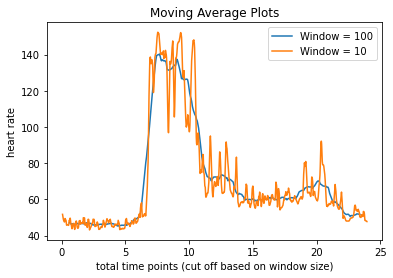

In [4]:
# Answer

def movingaverage(values,window):
    weights = np.repeat(1.0, window)/window
    return np.convolve(np.squeeze(values),weights, 'valid')

plt.plot(time[50:-49],movingaverage(hr,100), label = "Window = 100")
plt.plot(time[5:-4],movingaverage(hr,10), label = "Window = 10")
plt.legend(loc = "upper right")
plt.xlabel('total time points (cut off based on window size)')
plt.ylabel('heart rate')
plt.title('Moving Average Plots')
print('Moving average plots points that utilize a designated number of points (window)\n adjacent to the selected point and finds the average value')
print('So, in this case we see smoother lines with a greater window')
print('By using this approach, it is possible that we miss significant outliers that may have some inherent meaning\n We also remove points in the upper and lower bound of the data.')

#### (5) We're going to fit an HMM model to this data with three underlying states. This involves three sets of parameters about the model—describe each briefly.

Answer.

Initial, transmission and emission probabilities
Initial probabilities give the probabilities of the model
Transmission give the probabilities form one state to the other
Emission is the output probabilities or what you see given one state and seeing the actual observation.

#### (6) Fit an HMM model with Gaussian emissions to the data. Use any transformations as necessary.

How does the model respond to rapid state changes? Overlay the raw measurements and HMM state over time.

Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'


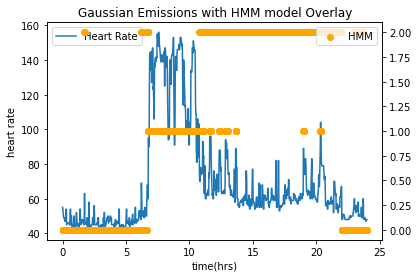

3 states are 0, 1, 2
For rapid state changes, we see the HMM states jump to the next state
this is mirrored change in the emission output (at least in the scope of their average) 


In [5]:
# Answer


model.fit(hr)
states = model.predict(hr)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(time,hr,label = "Heart Rate")
plt.legend(loc = "upper left")
ax1.set_ylabel('heart rate')

ax2 = ax1.twinx()
ax2.scatter(time, states, color = "orange", label = "HMM")
plt.legend(loc = "upper right")
plt.title('Gaussian Emissions with HMM model Overlay')
ax1.set_xlabel('time(hrs)')
plt.show();

# plt.plot(time, hr, label = "heart rate")
# plt.show()

# plt.scatter(time, states, color = 'orange', label = "HMM")

# plt.legend(loc = "upper right")
# plt.show()

print("3 states are 0, 1, 2")
print("For rapid state changes, we see the HMM states jump to the next state\nthis is mirrored change in the emission output (at least in the scope of their average) ")



#### (7) From the HMM model determine when you think the subject woke up in the morning. Compare this prediction to the data you obtain with the moving average.

Hint: `model.predict_proba(X)` can give you the probability of being in each state at each time point.

Predicted time based on HMM Model with original emissions
6:45


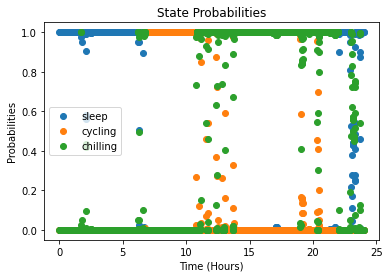

Predicted time based on HMM Model with moving average emissions
6:02


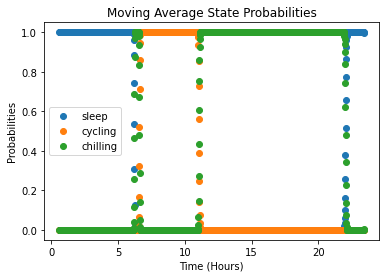

In [6]:
# Answer

stateP = model.predict_proba(hr)


plt.scatter(time, stateP[:,0], label = 'sleep')
plt.scatter(time, stateP[:,1], label = 'cycling')
plt.scatter(time, stateP[:,2], label = 'chilling')
plt.legend()
wake = stateP[:,1]
awake = np.where(wake >= 0.95)
hour = int(time[awake[0][0]]%10)
minutes = int((time[awake[0][0]] - 6) *60)
plt.ylabel('Probabilities')
plt.xlabel('Time (Hours)')
plt.title('State Probabilities')
print('Predicted time based on HMM Model with original emissions')
if(minutes < 10):
    print(str(hour)+":"+"0"+str(minutes))
else:
    print(str(hour)+":"+str(minutes))
plt.show()


move = movingaverage(hr,100)
move = move.reshape(-1,1)
stateMove = model.predict_proba(move)
plt.scatter(time[50:-49], stateMove[:,0], label = 'sleep')
plt.scatter(time[50:-49], stateMove[:,1], label = 'cycling')
plt.scatter(time[50:-49], stateMove[:,2], label = 'chilling')
plt.title('Moving Average State Probabilities')
plt.ylabel('Probabilities')
plt.xlabel('Time (Hours)')
plt.legend()
wakeMove = stateMove[:,1]
awakeMove = np.where(wakeMove >= 0.95)
hour = int(time[awakeMove[0][0]]%10)
minutes = int((time[awakeMove[0][0]] - 6) *60)
print('Predicted time based on HMM Model with moving average emissions')
if(minutes < 10):
    print(str(hour)+":"+"0"+str(minutes))
else:
    print(str(hour)+":"+str(minutes))
plt.show()






#### (8) Describe one form of other information you could use from a smart watch to make a more accurate determination of the user's state.

How would you use that in your HMM model?

Answer.

Smart watches can typically track steps and are concious of movement. Furthermore it has GPS tracking. So at quicker velocities, we a) can expect the user to be awake and b) likely to be cycling. At moderate to no velocity, but movmeent is picked up, we know the user is awake. Additionally, actual usage of the smart watch or smart device connected to the smart watch can implicate that the user is awake.

Movmeent (GPS),
steps,
active usage of the smart watch
